In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import tensorflow as tf

np.random.seed(2)

# MNIST 데이터 불러오기

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Feature scaling (Pre-processing)

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다.  
훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

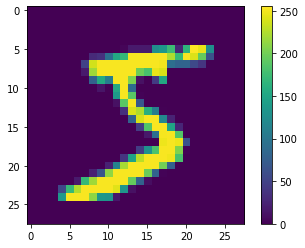

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에, 모든 값을 255로 나누어서, 이 값의 범위를 0~1 사이로 조정하겠습니다.   
훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

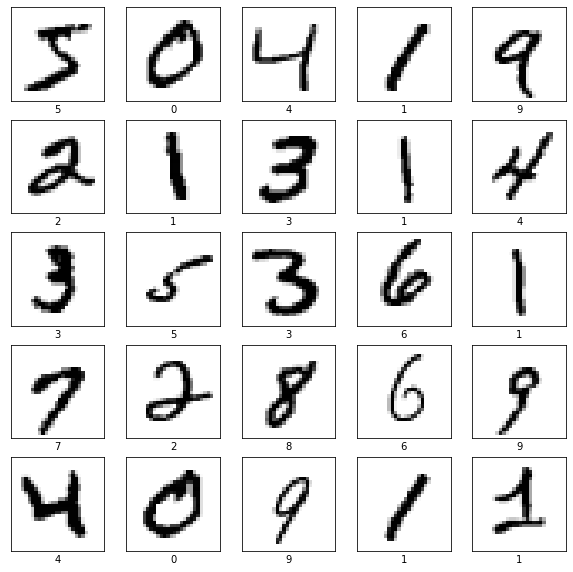

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
# convert one-hot vectors
depth = 10
y_one_hot_train = tf.one_hot(y_train, depth)
y_one_hot_test = tf.one_hot(y_test, depth)

print(y_one_hot_train[:5])

tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


# 모델 구성

![images](https://gombru.github.io/assets/cross_entropy_loss/softmax_CE_pipeline.png)

In [ ]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


모델이 잘 동작하는 지 확인
(훈련 세트에서 `10` 개의 샘플을 하나의 배치로 만들어 `model.predict` 메서드를 호출)

In [ ]:
example_batch = x_train[:10]
example_result = model.predict(example_batch)

with np.printoptions(precision=3, suppress=True):
  print(example_result)

[[0.052 0.136 0.139 0.05  0.151 0.078 0.034 0.172 0.067 0.119]
 [0.099 0.105 0.099 0.05  0.173 0.058 0.035 0.211 0.083 0.087]
 [0.064 0.106 0.108 0.107 0.131 0.102 0.048 0.148 0.078 0.109]
 [0.12  0.091 0.078 0.141 0.094 0.056 0.052 0.113 0.059 0.196]
 [0.082 0.072 0.123 0.12  0.097 0.095 0.04  0.203 0.057 0.111]
 [0.067 0.109 0.127 0.084 0.139 0.064 0.036 0.205 0.057 0.112]
 [0.101 0.123 0.075 0.053 0.15  0.066 0.048 0.127 0.071 0.186]
 [0.062 0.164 0.158 0.134 0.096 0.059 0.026 0.157 0.053 0.09 ]
 [0.101 0.083 0.104 0.083 0.104 0.076 0.058 0.162 0.064 0.165]
 [0.092 0.101 0.113 0.111 0.126 0.112 0.048 0.105 0.075 0.116]]


In [ ]:
EPOCHS = 8

history = model.fit(x_train, y_one_hot_train, epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/8
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4862 - accuracy: 0.8627 - val_loss: 0.1784 - val_accuracy: 0.9511
Epoch 2/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1436 - accuracy: 0.9592 - val_loss: 0.1183 - val_accuracy: 0.9646
Epoch 3/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0887 - accuracy: 0.9738 - val_loss: 0.1015 - val_accuracy: 0.9712
Epoch 4/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9826 - val_loss: 0.1000 - val_accuracy: 0.9697
Epoch 5/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0500 - accuracy: 0.9851 - val_loss: 0.0946 - val_accuracy: 0.9715
Epoch 6/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0896 - val_accuracy: 0.9721
Epoch 7/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9917 - val_loss: 0.0957 - val_accuracy: 0.9734

### 모델의 훈련 과정을 시각화

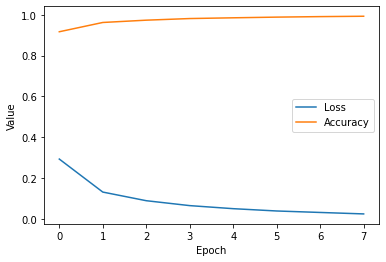

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.xlabel('Epoch')
  plt.ylabel('Value')
  plt.plot(hist['epoch'], hist['loss'],
           label='Loss')
  plt.plot(hist['epoch'], hist['accuracy'],
           label = 'Accuracy')

  plt.legend()

plot_history(history)

## 정확도 평가

테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문입니다.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_one_hot_test, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.0785 - accuracy: 0.9767

테스트 정확도: 0.9767000079154968


## 훈련 완료된 모델로 예측해보기 

모델을 훈련할 때 사용하지 않았던 테스트 세트에서 모델의 성능을 확인

In [ ]:
predictions = model.predict(x_test)

첫 번째 테스트 데이터에 대한 레이블 예측

In [ ]:
predictions[0]

array([8.8036121e-09, 4.5905026e-09, 1.3177103e-06, 4.0012875e-04,
       1.0593627e-13, 1.4729609e-09, 1.1028963e-12, 9.9959534e-01,
       1.0714431e-06, 2.1426786e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])  # 예측 레이블

7

In [ ]:
y_test[0]  # 실제 레이블

7

### 모델의 예측을 plot 해보기

In [ ]:
# 이미지와 labeling 확률을 plot 하는 함수
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img_data = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img_data, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

# 모델이 각 class를 예측할 확률을 bar graph로 나타내는 함수
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')    # 모델이 선택한 label의 확률은 빨간색으로
  thisplot[true_label].set_color('blue')        # 실제 label의 확률은 파란색으로

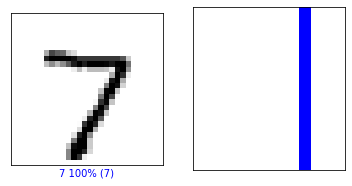

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

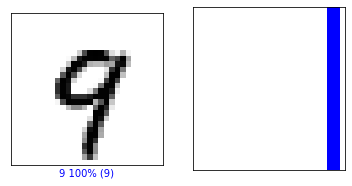

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

### 잘못된 예측한 테스트 이미지 확인해보기

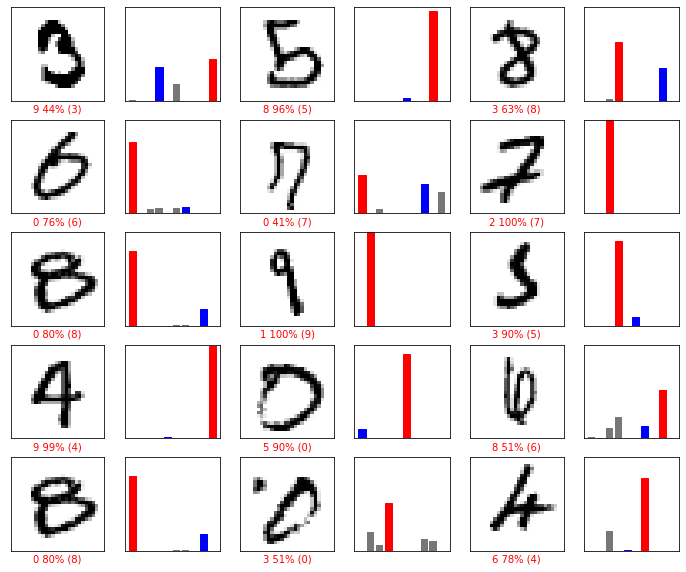

In [ ]:
wrong_preds = np.argwhere(np.argmax(predictions, axis=1) != y_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
wrong_index = np.random.choice(wrong_preds.reshape(-1), size=num_images)

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for idx, i in enumerate(wrong_index):
  plt.subplot(num_rows, 2*num_cols, 2*idx+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*idx+2)
  plot_value_array(i, predictions,  y_test)
plt.show()

# Convolutional Neural Network

패션 MNIST 이미지 데이터 분류 해보기

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png?hl=ko" width=70%>

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


레이블 |	클래스
-------|-------
0 |	T-shirt/top
1 |	Trouser
2 |	Pullover
3 |	Dress
4 |	Coat
5 |	Sandal
6 |	Shirt
7 |	Sneaker
8 |	Bag
9 |	Ankle boot

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

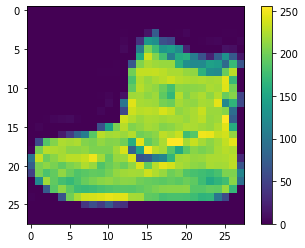

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# feature scaling
train_images = train_images / 255.0

test_images = test_images / 255.0

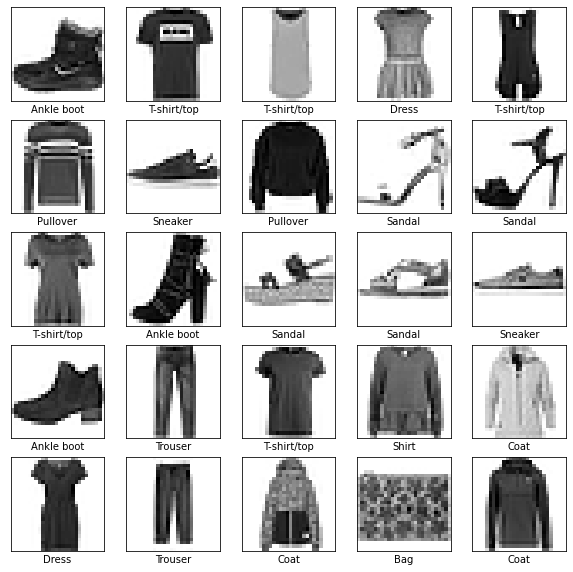

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
def build_NN_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

fashion_model = build_NN_model()

In [ ]:
EPOCHS = 8

history = fashion_model.fit(train_images, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/8
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6701 - accuracy: 0.7658 - val_loss: 0.4039 - val_accuracy: 0.8581
Epoch 2/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3944 - accuracy: 0.8593 - val_loss: 0.3990 - val_accuracy: 0.8561
Epoch 3/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3471 - accuracy: 0.8728 - val_loss: 0.3632 - val_accuracy: 0.8695
Epoch 4/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3245 - accuracy: 0.8793 - val_loss: 0.3491 - val_accuracy: 0.8724
Epoch 5/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2954 - accuracy: 0.8898 - val_loss: 0.3366 - val_accuracy: 0.8773
Epoch 6/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2879 - accuracy: 0.8932 - val_loss: 0.3258 - val_accuracy: 0.8833
Epoch 7/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2668 - accuracy: 0.9017 - val_loss: 0.3281 - val_accuracy: 0.8818

### 모델의 훈련 과정을 시각화

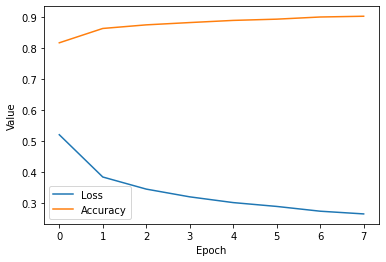

In [ ]:
plot_history(history)

## 정확도 평가

테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문입니다.

In [ ]:
test_loss, test_acc = fashion_model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3494 - accuracy: 0.8734

테스트 정확도: 0.8733999729156494


## 훈련 완료된 모델로 예측해보기
모델을 훈련할 때 사용하지 않았던 테스트 세트에서 모델의 성능을 확인

In [ ]:
predictions = fashion_model.predict(test_images)

In [ ]:
predictions[0]

array([7.8386142e-07, 3.1473214e-06, 1.8140978e-08, 1.1243909e-06,
       1.0035794e-06, 9.7034043e-03, 1.6525239e-06, 2.2860597e-01,
       2.1579846e-05, 7.6166135e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_fashion_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


### 모델의 예측을 plot 해보기

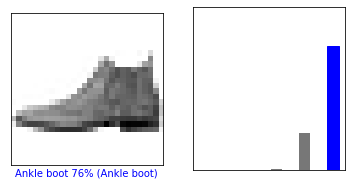

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_fashion_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

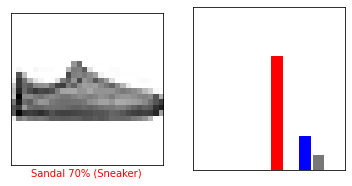

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_fashion_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

### 잘못된 예측한 테스트 이미지 확인해보기

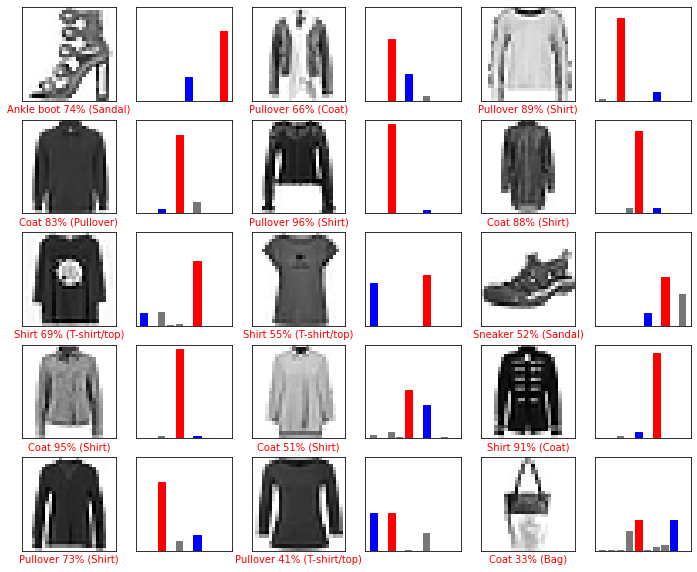

In [ ]:
wrong_preds = np.argwhere(np.argmax(predictions, axis=1) != test_labels)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
wrong_index = np.random.choice(wrong_preds.reshape(-1), size=num_images)

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for idx, i in enumerate(wrong_index):
  plt.subplot(num_rows, 2*num_cols, 2*idx+1)
  plot_fashion_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*idx+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## CNN 모델 사용
이제 CNN 모델을 사용하여 정확도를 향상시켜 보겠습니다.

In [ ]:
def build_CNN_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

cnn_model = build_CNN_model()
 

In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# image data에 channel을 추가해줘야함
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
EPOCHS = 8

history = cnn_model.fit(train_images, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/8
1500/1500 [==============================] - 47s 31ms/step - loss: 0.6930 - accuracy: 0.7503 - val_loss: 0.3662 - val_accuracy: 0.8680
Epoch 2/8
1500/1500 [==============================] - 45s 30ms/step - loss: 0.3398 - accuracy: 0.8762 - val_loss: 0.3177 - val_accuracy: 0.8845
Epoch 3/8
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2878 - accuracy: 0.8918 - val_loss: 0.2821 - val_accuracy: 0.8978
Epoch 4/8
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2618 - accuracy: 0.9033 - val_loss: 0.2745 - val_accuracy: 0.8997
Epoch 5/8
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2316 - accuracy: 0.9133 - val_loss: 0.2803 - val_accuracy: 0.8970
Epoch 6/8
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2110 - accuracy: 0.9214 - val_loss: 0.2495 - val_accuracy: 0.9096
Epoch 7/8
1500/1500 [==============================] - 47s 31ms/step - loss: 0.1926 - accuracy: 0.9267 - val_loss: 0.2553 - val_ac

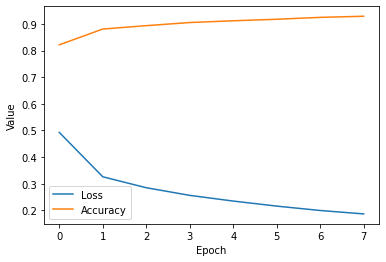

In [ ]:
plot_history(history)

In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 3s - loss: 0.2630 - accuracy: 0.9077

테스트 정확도: 0.9077000021934509


### Convolutional & Pooling 시각화

In [ ]:
from keras.models import Model

In [ ]:
cnn_model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
cnn_model.layers[:4]

In [ ]:
# 학습된 CNN 모델의 Convolutions & Pooling layer들로 구성된 새로운 모델을 구성
layer_outputs = [layer.output for layer in cnn_model.layers[:4]]
features_model = Model(inputs=cnn_model.input,outputs=layer_outputs)

In [ ]:
layer_names = []
for layer in cnn_model.layers[:4]:
    layer_names.append(layer.name) # 각 레이어의 이름을 저장
layer_names

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1']

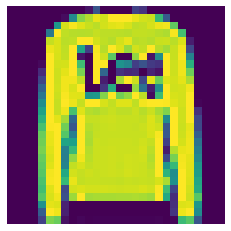

In [ ]:
img_for_conv = test_images[1]

plt.imshow(img_for_conv[:, :, 0], cmap='viridis')
plt.axis('off')
plt.show()

In [ ]:
results = features_model.predict(img_for_conv.reshape(1, 28, 28, 1))

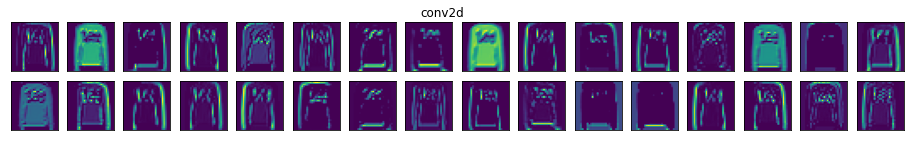

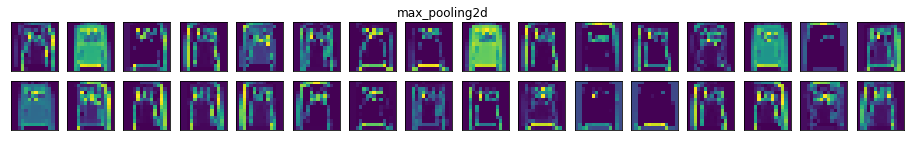

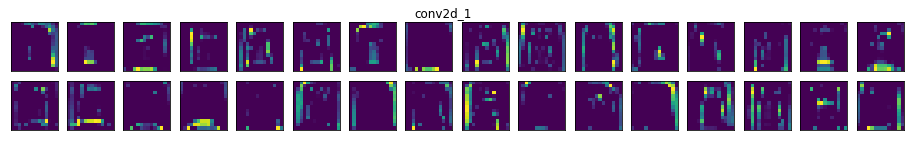

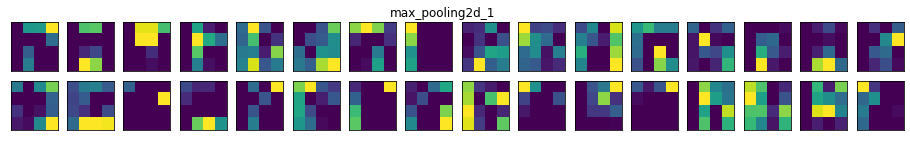

In [ ]:
images_per_row = 16

for layer_name, result in zip(layer_names, results):
  plt.figure(figsize=(16, 2))
  plt.suptitle(layer_name)
  plt.grid(False)

  result = result[0] # (1, size, size, channels) -> (size, size, channels)
  size, _, num_channels = result.shape
  n_cols = num_channels // images_per_row

  for col in range(n_cols): 
    for row in range(images_per_row):
      plt.subplot(n_cols, images_per_row, col * images_per_row + (row + 1))
      channel_image = result[:, :, col * images_per_row + row]
      plt.imshow(channel_image, aspect='auto', cmap='viridis')
      plt.xticks([])
      plt.yticks([])
  plt.show()